<a href="https://colab.research.google.com/github/rkrmishra/pytorch-work/blob/main/multiclass-classification/PyTorch_Sklearn_Dataset_and_DataLoader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Load dataset and use describe field to unstand what does this dataset contains

In [85]:
digits = load_digits()
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 1797\n:Number of Attributes: 64\n:Attribute Information: 8x8 image of integer pixels in the range 0..16.\n:Missing Attribute Values: None\n:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n:Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels are counted in each bl

## Let's see what all field are there in digits dataset

In [86]:
digits.data[0], digits.images[0], digits.feature_names[0], digits.target[0], digits.target_names[0], digits.frame

(array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]),
 array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]),
 'pixel_0_0',
 0,
 0,
 None)

## Prepare for processing
X : With features

y : target

In [87]:
X, y = digits.data, digits.target
X[0], y[0]

(array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]),
 0)

## Plot the image for validation

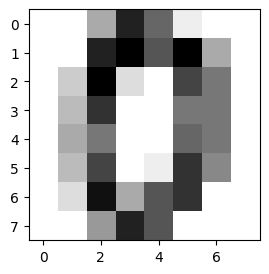

In [88]:
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation="nearest")
# Below line of code will error out, bacause data is flattened from image 8x8 matrix. So we will get shape error while ploting.
# plt.imshow(X[-1], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

## Standardise data with StandardScaler
- Note: We have used `fit_transform` and `transform`. That's because `fit` has been taken care as part of `fit_transform`. So just `transform` is enough in the next call.
- What does `fit` do ?
    - Calculates the parameters (e.g. `𝜇` and `𝜎` in case of StandardScaler) and saves them as an internal object's state.

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## We will define our own CustomerDataset class that will be inherited from `torch.utils.data,Dataset`

In [90]:
class CustomDataset(Dataset):
    def __init__(self, data, target):
        self.data = torch.tensor(data, dtype=torch.float32)
        self.target = torch.tensor(target, dtype=torch.long)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        sample = {
            'data': self.data[index],
            'target': self.target[index]
        }

        return sample


train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)



In [91]:
train_data_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True, num_workers=2)
test_data_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=True, num_workers=2)

len(train_data_loader), len(X_train)/32, len(test_data_loader), len(X_test)/32

(45, 44.90625, 12, 11.25)

In [92]:
class SimpleFCNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleFCNN, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x


In [93]:
X_train.shape


(1437, 64)

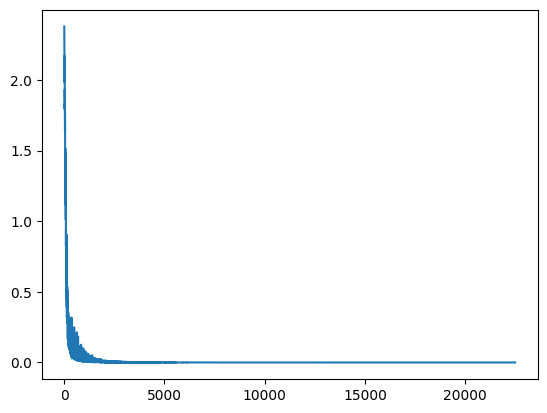

In [100]:
input_size = X_train.shape[1]
hidden_size = 64
output_size = len(set(y_train))

model_v1 = SimpleFCNN(input_size, hidden_size, output_size)
loss_fun = nn.CrossEntropyLoss()
optimiser = optim.Adam(model_v1.parameters(), lr = 0.001)


epochs = 500
all_loss = []

for epoch in range(epochs):
    model_v1.train()
    running_loss = 0.0

    for batch in train_data_loader:
        inputs = batch['data']
        targets = batch['target']

        optimiser.zero_grad()
        preds = model_v1(inputs)

        loss = loss_fun(preds, targets )
        all_loss.append(loss.item())
        loss.backward()
        optimiser.step()

        running_loss += loss.item()

    #print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss}')

plt.plot(all_loss)
plt.show()

## Evaluation of model_v1

In [101]:
model_v1.eval()

all_preds = []
all_targets = []

with torch.no_grad():
    correct = 0
    total = 0
    for batch in test_data_loader:
        inputs = batch['data']
        targets = batch['target']
        preds = model_v1(inputs)
        final_preds = torch.argmax(preds,dim=1)
        all_preds.extend(final_preds.numpy())
        all_targets.extend(targets.numpy())
        #print(f'targets.shape: {targets.shape}, preds.shape: {preds.shape}, final_preds.shape: {final_preds.shape}')
        total += targets.size(0)
        correct += (final_preds == targets).sum().item()


accuracy = correct / total
print(f'Accuracy : {accuracy}')

Accuracy : 0.9833333333333333
